# August 4 Status Meeting

## Progress so far:

In the last couple weeks, I was mainly on vacation. That being said, I was able to:

- Convert to case rates given the population value
- Linearly interpolate the values
- Started a dashboard but isn't perfected yet. Mainly updated to where I am in the code base now. Want to demo if time permits.


In [2]:
# Imports

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import sys 
import os 

sys.path.append(os.path.abspath('..'))

from models import LSTM, TransformerModel
from transformer_modules.attention import MultiHeadAttention
from data_utils import prep_data
from data_loader import combine_vf_fire_pop_data
from loss_functions import RMSELoss
import torch.optim as optim 
from trainer import Trainer

In [3]:
# File Paths and Parameters
fire_data_path       = "../../data/CAL_FIRE_Wildland_PublicReport_2000to2018.csv"
vf_data_path         = "../../data/coccidioidomycosis_m2000_2015_v0.1.csv"
pop1_data_path       = "../../data/cali_county_pop_2000_2010.csv" 
pop2_data_path       = "../../data/cali_county_pop_2010_2020.csv"
start_year           = "2006"
end_year             = "2015"

### Plotting Population and Case Rates (vs Case Count)

/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_monthly = fire_county.resample("M").size()
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range("2006-01-01", "2018-12-31", freq="M")
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_monthly = fire_county.resample("M").size()
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range("2006-01-01", "2018-12-31", freq="M")
/Users/dballen/Documents/GitHub/CSUF-Proje

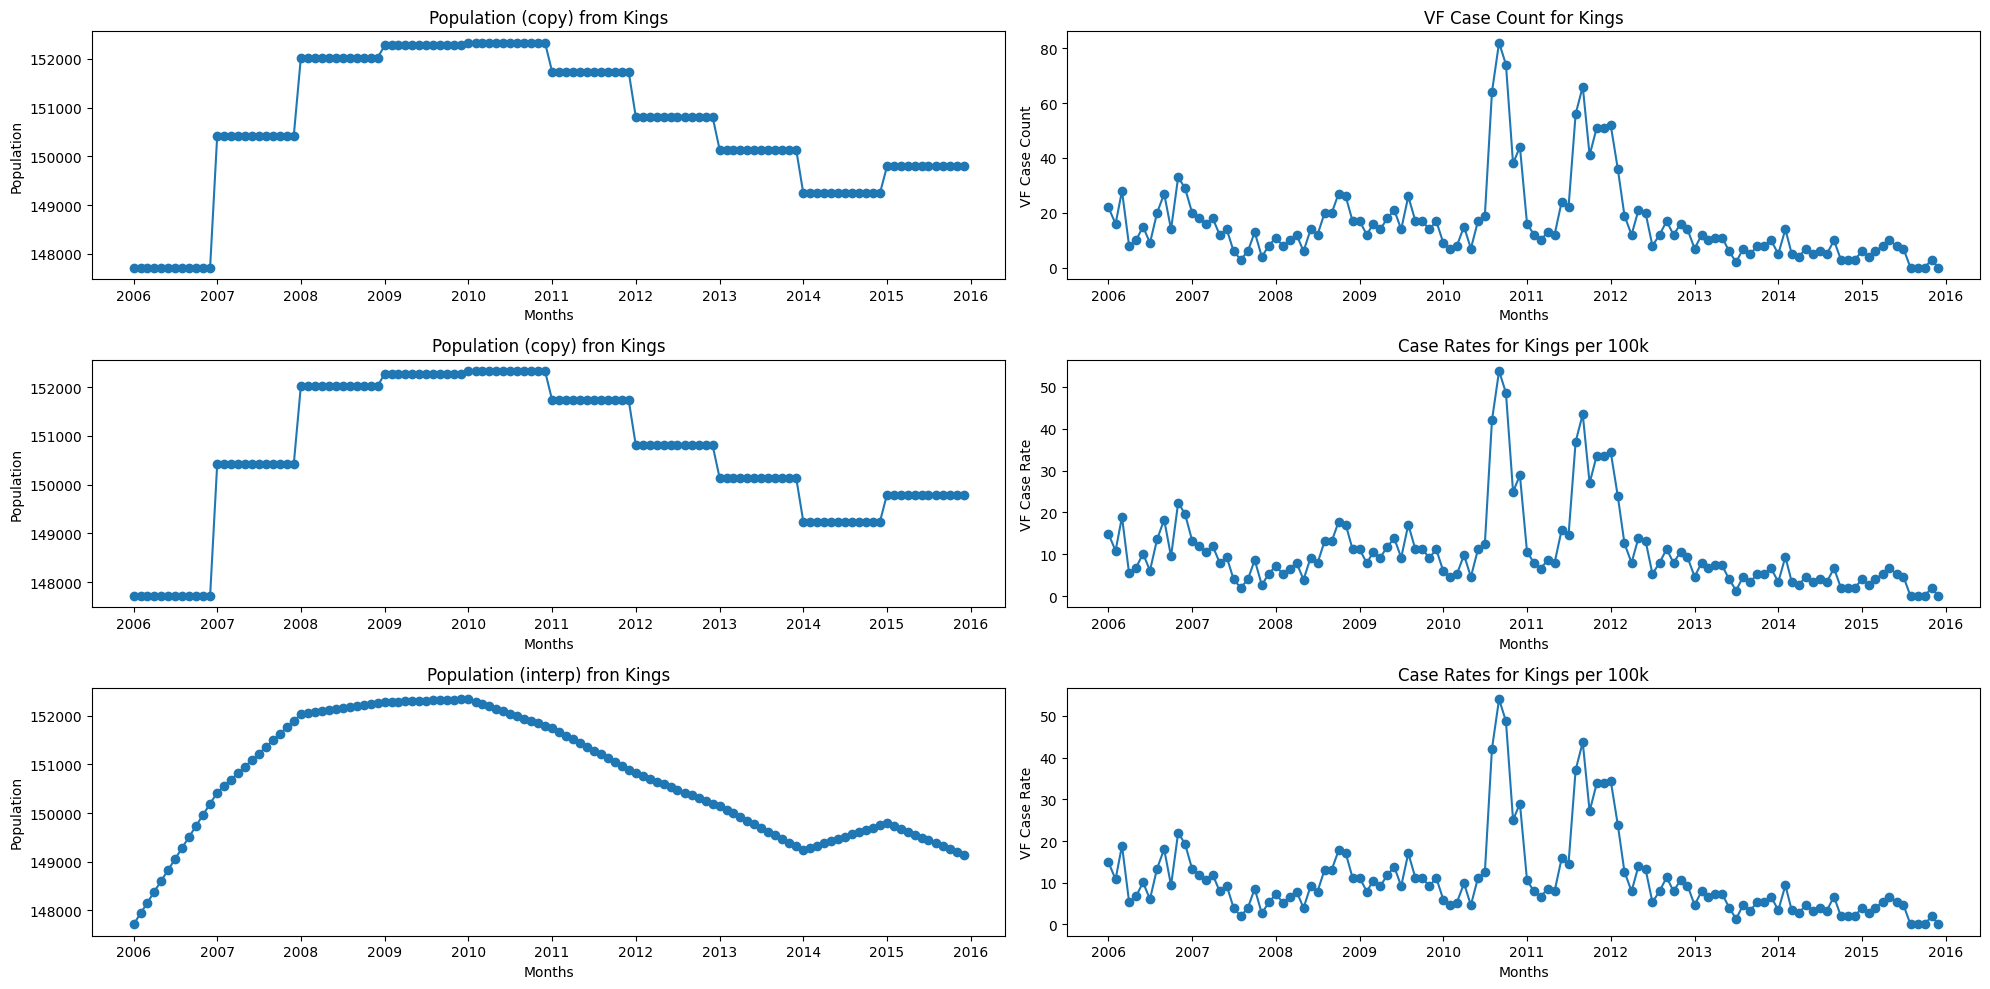

In [24]:
# Plotting the standard stuff for Fresno
county_name = "Kings"
df1 = combine_vf_fire_pop_data(pop1_data_path, pop2_data_path, vf_data_path, fire_data_path,
                               county_name, start_year, end_year, bInterp=False, bConvRate=False)
df2 = combine_vf_fire_pop_data(pop1_data_path, pop2_data_path, vf_data_path, fire_data_path,
                               county_name, start_year, end_year, bInterp=False, bConvRate=True)
df3 = combine_vf_fire_pop_data(pop1_data_path, pop2_data_path, vf_data_path, fire_data_path,
                               county_name, start_year, end_year, bInterp=True, bConvRate=True)

fig, axes = plt.subplots(nrows = 3, ncols=2, figsize=(20,10))
axes[0,0].plot(df1["Population"], linestyle='-', marker='o')
axes[0,0].set_title(f"Population (copy) from {county_name}")
axes[0,0].set_xlabel("Months")
axes[0,0].set_ylabel("Population")

axes[0,1].plot(df1["VF Case Count"], linestyle='-', marker='o')
axes[0,1].set_title(f"VF Case Count for {county_name}")
axes[0,1].set_xlabel("Months")
axes[0,1].set_ylabel("VF Case Count")

axes[1,0].plot(df2["Population"], linestyle="-", marker='o')
axes[1,0].set_title(f"Population (copy) fron {county_name}")
axes[1,0].set_xlabel("Months")
axes[1,0].set_ylabel("Population")

axes[1,1].plot(df2["VF Case Rate"], linestyle="-", marker='o')
axes[1,1].set_title(f"Case Rates for {county_name} per 100k")
axes[1,1].set_xlabel("Months")
axes[1,1].set_ylabel("VF Case Rate")

axes[2,0].plot(df3["Population"], linestyle="-", marker='o')
axes[2,0].set_title(f"Population (interp) fron {county_name}")
axes[2,0].set_xlabel("Months")
axes[2,0].set_ylabel("Population")

axes[2,1].plot(df3["VF Case Rate"], linestyle="-", marker='o')
axes[2,1].set_title(f"Case Rates for {county_name} per 100k")
axes[2,1].set_xlabel("Months")
axes[2,1].set_ylabel("VF Case Rate")
plt.tight_layout()
plt.show()

### Run Model with different implementations

/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fire_monthly = fire_county.resample("M").size()
/Users/dballen/Documents/GitHub/CSUF-Project-Code/Project/code/data_loader.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range("2006-01-01", "2018-12-31", freq="M")


Epoch 1/300 - Training Loss 0.4498, Testing Loss 0.2116
Epoch 11/300 - Training Loss 0.2482, Testing Loss 0.1075
Epoch 21/300 - Training Loss 0.2127, Testing Loss 0.2656
Epoch 31/300 - Training Loss 0.1993, Testing Loss 0.1505
Epoch 41/300 - Training Loss 0.1888, Testing Loss 0.2062
Epoch 51/300 - Training Loss 0.1796, Testing Loss 0.1497
Epoch 61/300 - Training Loss 0.1712, Testing Loss 0.1355
Epoch 71/300 - Training Loss 0.1619, Testing Loss 0.0749
Epoch 81/300 - Training Loss 0.1560, Testing Loss 0.0589
Epoch 91/300 - Training Loss 0.1469, Testing Loss 0.0626
Epoch 101/300 - Training Loss 0.1378, Testing Loss 0.0633
Epoch 111/300 - Training Loss 0.1329, Testing Loss 0.0661
Epoch 121/300 - Training Loss 0.1264, Testing Loss 0.0708
Epoch 131/300 - Training Loss 0.1136, Testing Loss 0.0889
Epoch 141/300 - Training Loss 0.1223, Testing Loss 0.0806
Epoch 151/300 - Training Loss 0.1167, Testing Loss 0.0771
Epoch 161/300 - Training Loss 0.1136, Testing Loss 0.0780
Epoch 171/300 - Training 

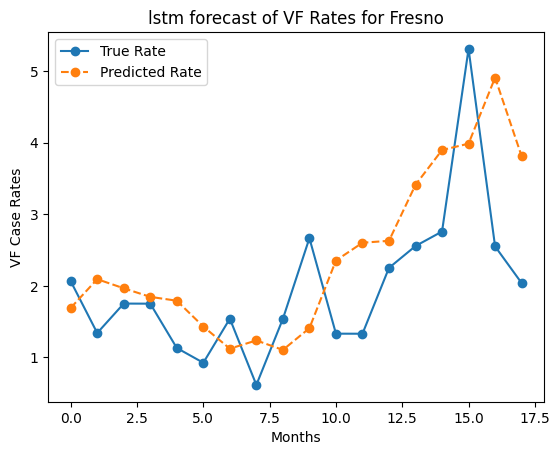

In [39]:
# Model Parameters
county_name          = "Fresno"
split_frac           = .85
lookback             = 6
hidden_size          = 64
num_layers           = 2
dropout              = 0.2
learning_rate        = 0.001
epochs             = 300
weight_decay         = 1e-5
model_flag           = "lstm"

if model_flag == "transformer":
  d_model         = 32
  nheads          = 2
  dim_feedforward = 64
  num_layers      = 1
  dropout         = 0.2

source_column_labels = ["Fire Incident Count", "VF Case Rate", "Population"]
input_size = len(source_column_labels)

# Run Model

df = combine_vf_fire_pop_data(pop1_path=pop1_data_path, pop2_path=pop2_data_path, vf_cases_path=vf_data_path,
                              wildfire_path=fire_data_path, county=county_name, start_year=start_year,
                              end_year=end_year, bConvRate=True, bInterp=True)

X_train, y_train, X_test, y_test, scaler = prep_data(df, source_column_labels, 
                                                        split_frac, lookback, b_scaler=True)

if model_flag == "lstm":
  model     = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout)
elif model_flag == "transformer":
  model = TransformerModel(input_size= input_size, d_model = d_model, nhead= nheads, num_layers = num_layers,
                          dim_feedforward= dim_feedforward, dropout=dropout, attention_impl=MultiHeadAttention)
else:
  raise NotImplementedError("Missing Arch")

criterion = RMSELoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)  

trainer = Trainer(model = model, criterion = criterion, optimizer = optimizer, scaler = scaler)
trainer.train(X_train, y_train, X_test, y_test, epochs)

y_pred, y_true = trainer.evaluate(X_test, y_test)

plt.plot(y_true, label = "True Rate", linestyle="-", marker='o')
plt.plot(y_pred, label = 'Predicted Rate', linestyle = '--', marker = 'o')
plt.title(f"{model_flag} forecast of VF Rates for {county_name}")
plt.xlabel("Months")
plt.ylabel("VF Case Rates")
plt.legend()

plt.show()